# 第二题：决策树处理回归任务

实验内容
1.	使用sklearn.tree.DecisionTreeRegressor完成kaggle房价预测问题
2.	计算最大深度为10的决策树，训练集上十折交叉验证的MAE和RMSE
3.	绘制最大深度从1到30，决策树在训练集和测试集上MAE的变化曲线
4.  选择一个合理的树的最大深度，并给出理由

## 1. 读取数据

In [19]:
import pandas as pd
data = pd.read_csv('data/kaggle_house_price_prediction/kaggle_hourse_price_train.csv')

In [20]:
# 丢弃有缺失值的特征（列）
data.dropna(axis = 1, inplace = True)

# 只保留整数的特征
data = data[[col for col in data.dtypes.index if data.dtypes[col] == 'int64']]

In [21]:
data.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


## 2. 数据集划分

70%做训练集，30%做测试集

In [22]:
from sklearn.utils import shuffle

In [23]:
data_shuffled = shuffle(data, random_state = 32)
split_line = int(len(data_shuffled) * 0.7)
training_data = data_shuffled[:split_line]
testing_data = data_shuffled[split_line:]

## 3. 导入模型

In [24]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [25]:
from sklearn.tree import DecisionTreeRegressor

## 4. 选取特征和标记

In [35]:
features = data.columns.tolist()
target = 'SalePrice'
features.remove(target)

training_data[target].shape

(1021,)

## 5. 训练与预测

请你在下面计算树的最大深度为10时，使用训练集全量特征训练的决策树的十折交叉验证的MAE和RMSE  

In [44]:
def eval(y_true, y_pred):
    ab_error = mean_absolute_error(y_true, y_pred)
    squ_error = mean_squared_error(y_true, y_pred) 
    return  ab_error, squ_error# YOUR CODE HERE
model = DecisionTreeRegressor(max_depth = 10) # 参数max_depth决定了决策树的最大深度
y_pred =cross_val_predict(model, training_data[features],training_data[target], cv=10)
ab_error, squ_error = eval(y_true=training_data[target], y_pred=y_pred)
print(y_pred.shape)
print(squ_error ,  ab_error )


(1021,)
1915601401.510844 27146.486527331825


###### 双击此处编辑
最大深度为10，全量特征的决策树，十折交叉验证指标

MAE|RMSE
-|-
 2459251926.162921 |28237.653448703233

## 6. 改变最大深度，绘制决策树的精度变换图

绘制最大深度从1到30，决策树训练集和测试集MAE的变化图

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")

3171838686.2584424
2311823530.1734924
1914684200.8874016
1397573310.260789
1743103961.9922287
1392532757.5769055
1511538178.8064678
1603176911.1342719
1877847226.2057693
1875142125.69924
1758818924.228836
1860965294.2956104
1558008406.501386
2004570394.5797555
1930546229.251417
1512375540.8617911
1865946029.9502282
1605968173.6093078
1798327972.4954443
2072951177.4474442
1739487131.2424548
1543373277.9471855
2124362296.7084281
1509925245.465262
1451552682.5808656
1582161665.2665148
1561887525.9886105
1606080770.5466971
1525495587.6674259


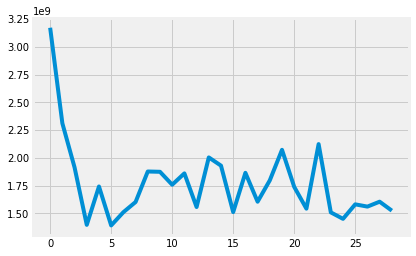

In [48]:
squ_list=[]
for i in range(1,31):
    model = DecisionTreeRegressor(max_depth = i) # 参数max_depth决定了决策树的最大深度
    y_pred=model.fit(training_data[features],training_data[target]).predict(testing_data[features])
    ab_error, squ_error = eval(y_true=testing_data[target], y_pred=y_pred)
    print(squ_error  )
    squ_list.append(squ_error)
plt.plot(squ_list)
plt.show()


请你选择一个合理的树的最大深度，并给出理由
###### 双击此处编辑



